 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_data.dropna(inplace=True)
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
whale_data.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_data.dropna(inplace=True)
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
algo_data.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_returns = Path("Resources/sp500_history.csv")
sp500_data = pd.read_csv(sp500_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_data["Close"]= sp500_data["Close"].str.replace('$', '', regex = True).astype("float")
sp500_data.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp500_daily_returns = sp500_data.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns= {"Close":"SP500"}, inplace=True)
sp500_daily_returns.head()
sp500_daily_returns.dtypes

SP500    float64
dtype: object

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_data, algo_data, sp500_daily_returns], axis = "columns", join ="inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

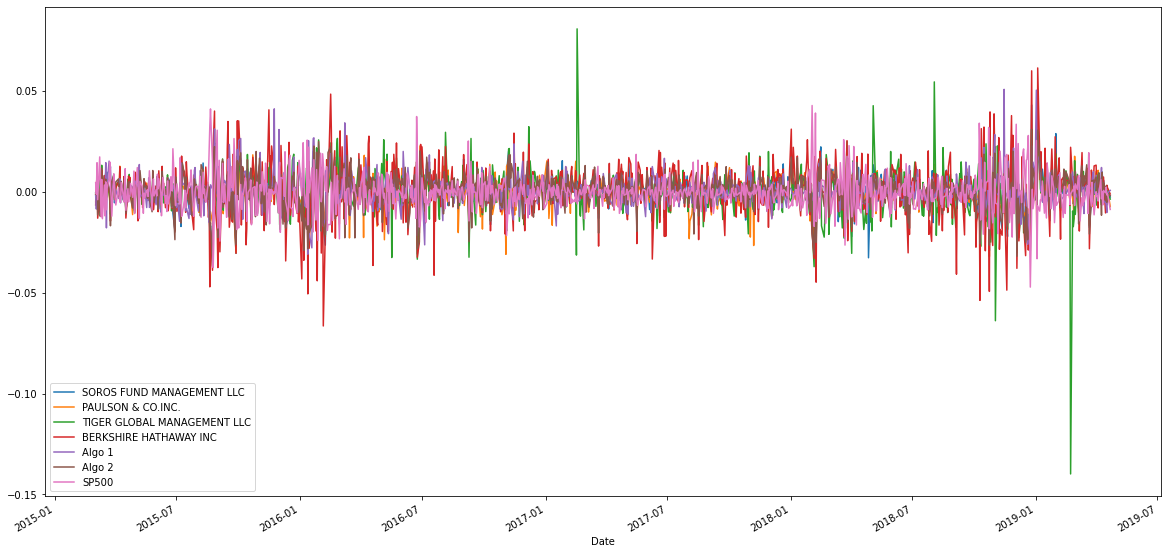

In [17]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

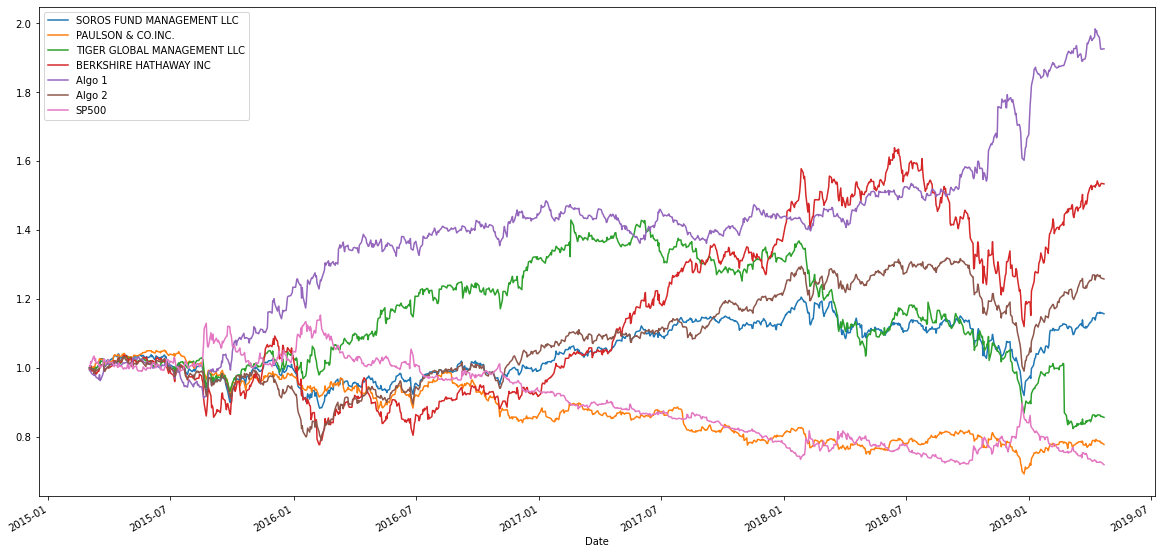

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

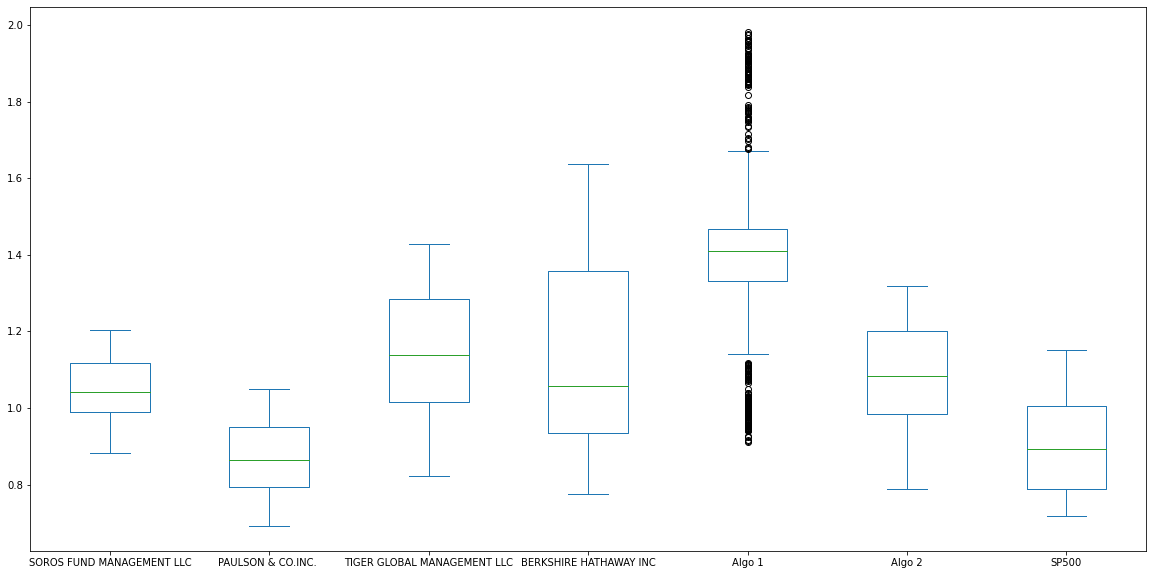

In [19]:
# Box plot to visually show risk
cumulative_returns.plot(kind='box', figsize =(20,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
cumulative_std = cumulative_returns.std()
cumulative_std.head()

SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily_returns.std()
sp500_std.head()
# Determine which portfolios are riskier than the S&P 500
total_std = pd.DataFrame(combined_returns.std()).rename(columns = {0:"std"})
total_std.sort_values('std', ascending=False)


,std
BERKSHIRE HATHAWAY INC,0.012919
TIGER GLOBAL MANAGEMENT LLC,0.010897
SP500,0.008587
Algo 2,0.008341
SOROS FUND MANAGEMENT LLC,0.007896
Algo 1,0.007623
PAULSON & CO.INC.,0.007026


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annual_asd = total_std*np.sqrt(252)
annual_asd

,std
SOROS FUND MANAGEMENT LLC,0.125348
PAULSON & CO.INC.,0.111527
TIGER GLOBAL MANAGEMENT LLC,0.172989
BERKSHIRE HATHAWAY INC,0.205079
Algo 1,0.121006
Algo 2,0.132413
SP500,0.136313


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

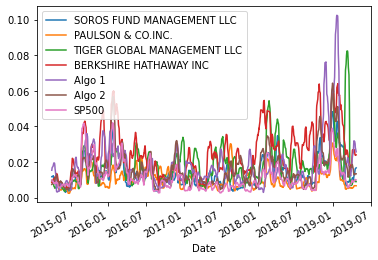

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolios_rolling21 = cumulative_returns.rolling(window=21).std().plot()
# Plot the rolling standard deviation
portfolios_rolling21

### Calculate and plot the correlation

<AxesSubplot:>

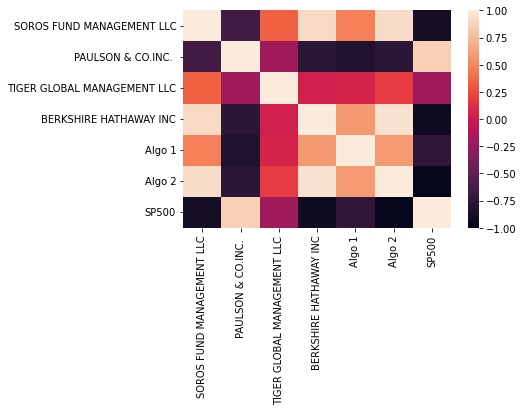

In [24]:
# Calculate the correlation
portfolio_correlation = cumulative_returns.corr()
# Display de correlation matrix
sns.heatmap(portfolio_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

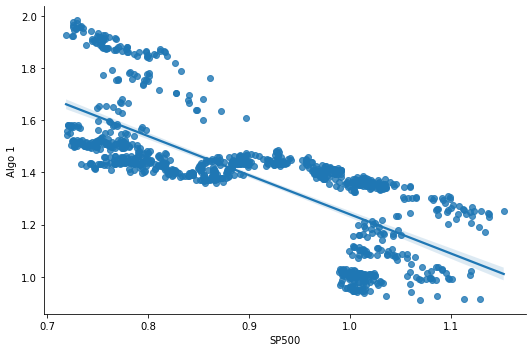

In [25]:
# Calculate covariance of a single portfolio
covariance_algo1 = cumulative_returns['Algo 1'].corr(cumulative_returns['SP500'])
covariance_algo1
# Calculate variance of S&P 500
variance_sp500 = cumulative_returns['SP500'].var()
variance_sp500
# Computing beta
algo1_beta = covariance_algo1 / variance_sp500
algo1_beta
# Plot beta trend
sns.lmplot(x='SP500', y='Algo 1', data=cumulative_returns, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

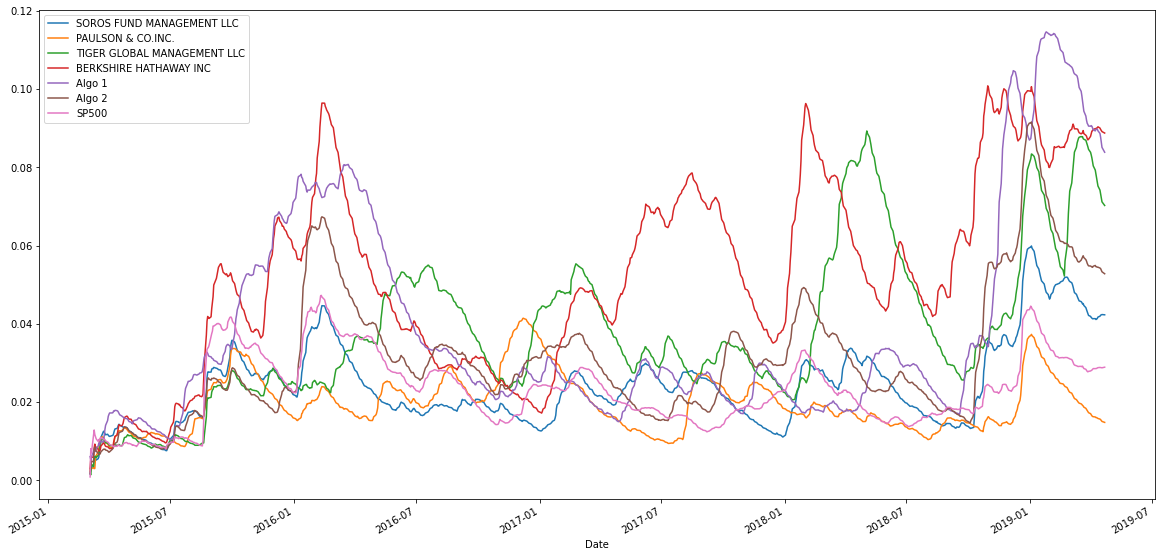

In [26]:
# Use `ewm` to calculate the rolling window
cumulative_returns.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
correlation = cumulative_returns.corr()
sharpe_ratio = (cumulative_returns.mean()*252) / (cumulative_returns.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      227.687958
PAULSON & CO.INC.              157.248487
TIGER GLOBAL MANAGEMENT LLC    121.800710
BERKSHIRE HATHAWAY INC          76.237589
Algo 1                          95.098459
Algo 2                         131.052181
SP500                          124.481171
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

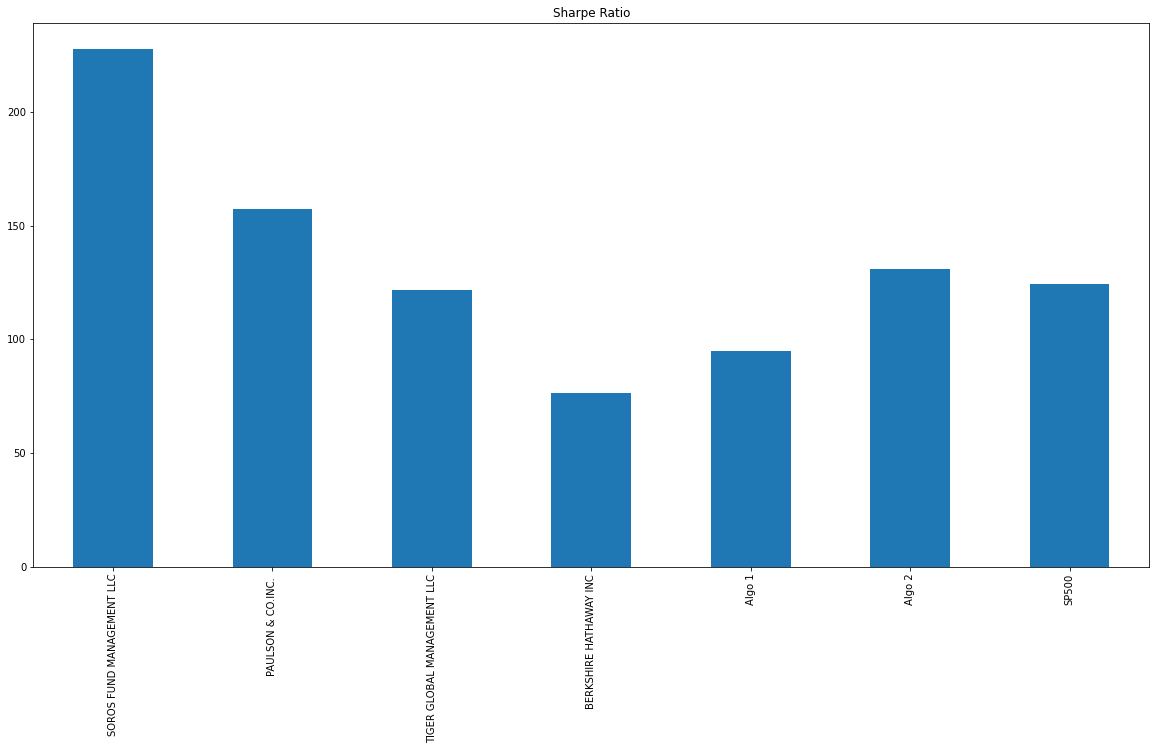

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', figsize=(20,10), title='Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
cost_returns = Path("Resources/cost_historical.csv")
cost_data = pd.read_csv(cost_returns, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_data.rename(columns = {"NOCP":"cost"}, inplace=True)
cost_data = cost_data.drop(columns = ["Symbol"])
cost_data.head()

,cost
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [30]:
# Reading data from 2nd stock
aapl_returns = Path("Resources/aapl_historical.csv")
aapl_data = pd.read_csv(aapl_returns, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_data.rename(columns = {"NOCP":"aapl"}, inplace=True)
aapl_data = aapl_data.drop(columns = ["Symbol"])
aapl_data.head()

,aapl
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [31]:
# Reading data from 3rd stock
goog_returns = Path("Resources/goog_historical.csv")
goog_data = pd.read_csv(goog_returns, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_data.rename(columns = {"NOCP":"goog"}, inplace=True)
goog_data = goog_data.drop(columns = ["Symbol"])
goog_data.head()

,goog
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [32]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([goog_data, aapl_data, cost_data], axis="columns", join="inner")
combined_df

,goog,aapl,cost
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [33]:
# Reset Date index
combined_df.index = combined_df.index.normalize()

In [34]:
# Reorganize portfolio data by having a column per symbol
combined_df.head()

,goog,aapl,cost
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [35]:
# Calculate daily returns
daily_returns = combined_df.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns.head()

,goog,aapl,cost
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio = combined_df.dot(weights)
portfolio_returns = portfolio.pct_change()
portfolio_returns.dropna(inplace=True)
# Display sample data
portfolio_returns.head()

Trade DATE
2019-05-08    0.002452
2019-05-07    0.004117
2019-05-06    0.015435
2019-05-03   -0.000201
2019-05-02   -0.016641
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([portfolio_returns, combined_returns], axis="columns", join="inner" )
combined_returns.rename(columns = {0:"MY PORTFOLIO"}, inplace = True)
combined_returns.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-04-22,-0.012121,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.006335,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.000599,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.007899,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.003027,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-04-22,-0.012121,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.006335,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.000599,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.007899,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.003027,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.009334,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-16,0.002375,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-15,-0.005114,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-14,0.015796,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
combined_returns_std = combined_returns.std()
combined_returns_std.head()

MY PORTFOLIO                   0.014405
SOROS FUND MANAGEMENT LLC      0.009234
PAULSON & CO.INC.              0.007350
TIGER GLOBAL MANAGEMENT LLC    0.014642
BERKSHIRE HATHAWAY INC         0.015548
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

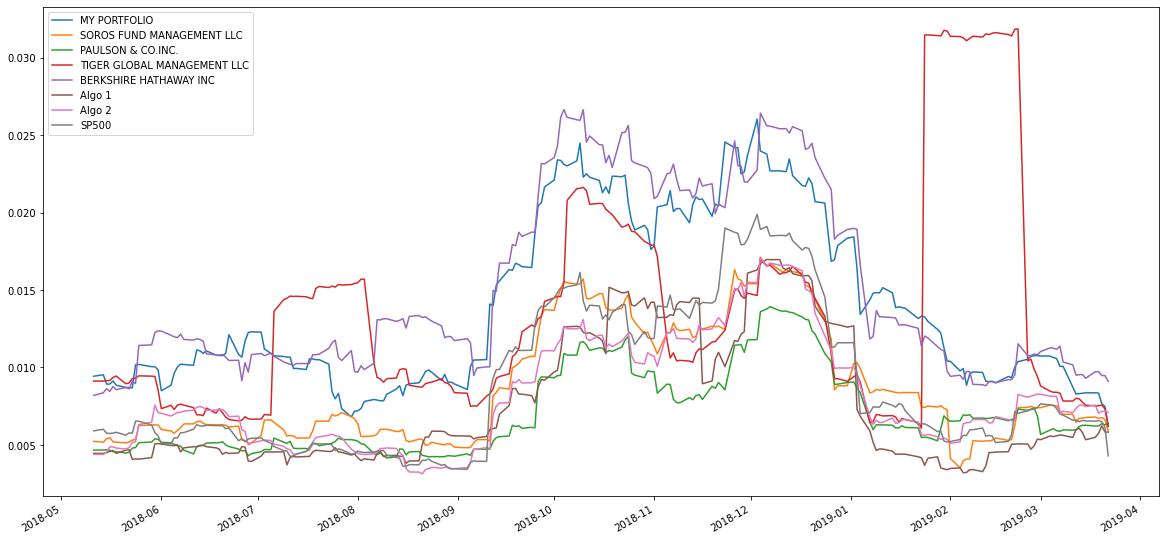

In [40]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

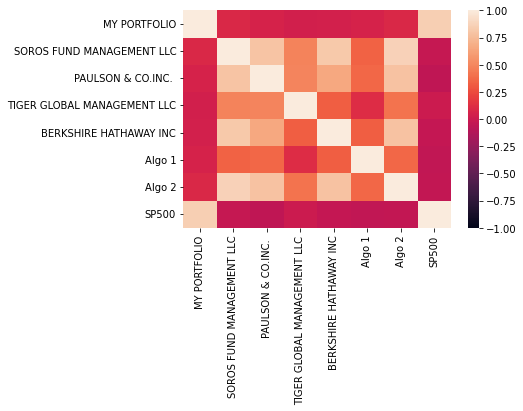

In [41]:
# Calculate and plot the correlation
correlation = combined_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

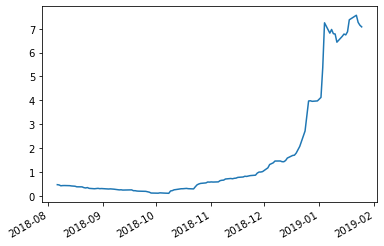

In [42]:
# Calculate and plot Beta
covariance = portfolio_returns.rolling(window=60).cov(combined_returns['SP500'])
variance = (combined_returns['SP500']).rolling(window=60).var()
portfolio_beta = covariance / variance
portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean()*252) / (combined_returns.std()*np.sqrt(252))
sharpe_ratios

MY PORTFOLIO                  -0.570096
SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
SP500                         -0.432942
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

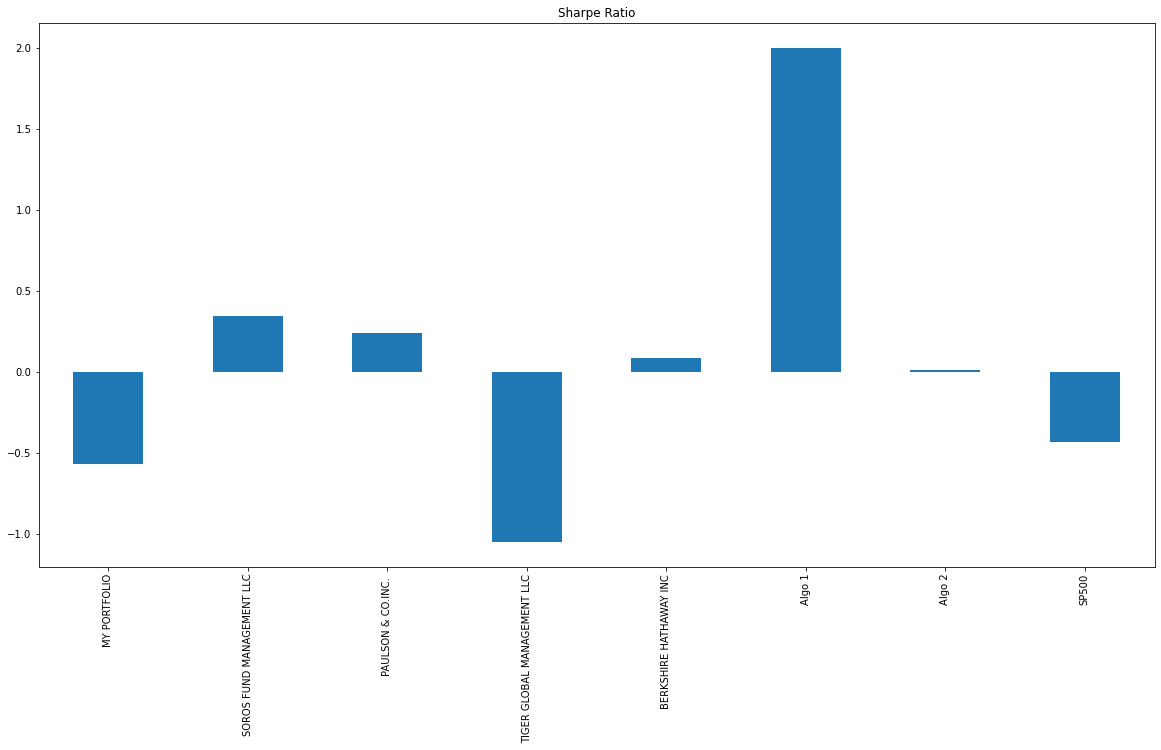

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(20,10), title ="Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

In [45]:
print("My portfolio performed worse than the SP500")

My portfolio performed worse than the SP500
